### 時系列データの異常検知
これまでは、各観測値が互いに独立であるという前提で、様々な異常検知の方法を紹介してきました。  
しかし、自動車や航空機など世の中の多くの動的な系から生じる時系列データを考える場合、  
隣り合う時刻の観測値同士には明らかな相互関係があり、その関係を無視することはできません。  
  
時系列データにおけるいくつかの典型的な異常パターンをみていきます。  
いずれも人間が見れば明らかに異常とわかりますが、各観測値の時刻を適当に並び替えてしまうと検知はできなくなります。  
これは、前の時刻の観測値との関係が異常の判定に本質的であることを示しています。したがって、観測値が互いに独立であると仮定する方法は、  
これらの異常の検知には無力です。今回は、データの時系列性を明示的に取り入れた異常検知の方法を考えます。

### 近傍法による異常部位検出
時系列性を明示的に取り入れるための最も簡単な方法は、時間的に隣接した観測値をひとまとまりにして扱うことです。  
その際に、"スライド窓"により時系列データをベクトルの集まりに変換する手法を使い、異常部位検出という問題をときます。

#### スライド窓による時系列データの変換
話を単純化するため、１次元の時系列を考えます。観測値として長さ$T$の時系列が$D=\{\xi^{(1)}, \xi^{(2)}, ... , \xi^{(T)},\}$のように与えられていると考えます。各時刻の観測値をそれぞれ扱うのではなく、$w$個の隣接した観測値をまとめて、
  
$$
x^{(1)} \equiv \left( \begin{array}{c} \xi^{(1)} \\ \xi^{(2)} \\ \vdots \\ \xi^{(w)} \end{array} \right), x^{(2)} \equiv \left( \begin{array}{c} \xi^{(2)} \\ \xi^{(3)} \\ \vdots \\ \xi^{(w+1)} \end{array} \right), ...
$$
  
のように、データを$w$次元ベクトルの集まりとして表すことにします。  
これにより、長さ$T$の観測値からなる時系列データは、  
  
$$
N = T - w + 1
$$
  
本の$w$次元ベクトルに変換されます。1を足すのか引くのか迷いがちですが、「$w=T$なら1本しか作れない」ことを理解すれば良いです。  
これの意味することは、長さ$w$の窓を左から右に動かして、次々に長さ$w$の時系列片を作っていくということです。  
この窓のことを、**『スライド窓』**(滑走窓)などと呼びます。スライド窓により生成したベクトルのことを、普通の多変量データと区別するために  
**部分時系列**という呼び方をすることがあります。本来のベクトルと時系列は別物ですが、両者をあえて区別せずに使うこともあります。

#### 異常部位検出問題
スライド窓を使って、時系列データをベクトルの集まりに変換してしまえば、これまで扱ってきたデータ$D=\{x^{(1)}, x^{(2)}, ... , x^{(N)}\}$と同じなので、今まで扱ってきた技術を使って異常検知の問題を解くことが可能となります。裏を返せば、時系列データの異常検知は、スライド窓が肝心な訳です。  
  
ここで注意して欲しいのは、**スライド窓で生成したベクトルは統計的独立性の仮定を満たさない**という点です。  
特に、ある程度滑らかな実数値時系列データの場合、隣り合った部分時系列の要素の値はほとんど等しくなり、これを自己一致とか自明な一致などと呼びます。部分時系列の類似度や距離の計算をする際には、この点が若干注意となります。  
   
**異常部位検出**の問題は、外れ値検出問題を部分時系列に対して適用したものと理解できます。  
異常度の計算には、近傍法に基づく方法が広く使われています。以下に、基本手順を紹介します。

#### 異常部位発見
訓練用の時系列$D_{tr}$と、検証用の時系列$D$を用意し、それぞれを窓幅$w$により、部分時系列ベクトルの集合に変換しておく。  
距離を計算するための関数$dist$を用意する。異常度の判定に使う近傍数$k$をあらかじめ決めておく。また、$k$近傍から異常度を計算する  
関数$score$を用意する。  
  
1) $D$各要素$x^{(t)}$について以下を行う$(t=1,2,...,N)$  
        a) 距離の計算: $dist$を用いて、$D_{tr}$の各要素と$x^{t}$の距離を計算する  
        b) スコアの計算: 上記で求めた距離のうち最小のもの$k$個を選び、$score$関数により異常度を計算して記録する  
  
2) 異常度が最大のものを異常部位として列挙する
  

上記で突然現れた2つの関数、$dist$と$score$関数について簡単に説明しておきます。  
  
まず$dist$については、典型的にはユークリッド距離、ときにはマハラノビス距離が使われますが、任意のノルムを用いることもあります。  
少なくとも実用上は、任意の非類似度を問題の文脈に合わせて工夫することもあります。そのような場合で最もよく使われるのが**動的時間伸縮法**による類似度です。この場合は、距離最小の代わりに、類似度最大の相手を選びます。  
  
動的時間伸縮法はもともと、音声認識の分野で、ゆっくり話しても早口で話しても変わらず認識できるようにするという目的のもと開発された手法です。  
時間軸の局所的な伸び縮みを許容して部分時系列を比較するため、元の時系列に含まれるノイズを吸収する効果が期待でき、実際に、検出精度が向上  
するとの報告が多数あります。(参考までに、興味ある方は、[Keogh](https://dl.acm.org/doi/10.1145/2339530.2339576)らの論文をみてみてください。)  
  
関数$score$については、$k=1$と選んだ上で、最近傍までの距離の値そのものを異常度とすることが多い。形式的にかけば、
  
$$
score(x^{(t)}, D_{tr}) = (x^{t}の最近傍までの距離)
$$
  
となります。もちろん、$k>1$として近傍距離の平均を考える、なども可能です。

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd

[心電図のデータセットを使います](http://www.cs.ucr.edu/~eamonn/discords/)

In [3]:
# CSVファイルの読み込み
df_csv = pd.read_csv('chfdb_chf13_45590.txt', index_col=0, sep='\t')

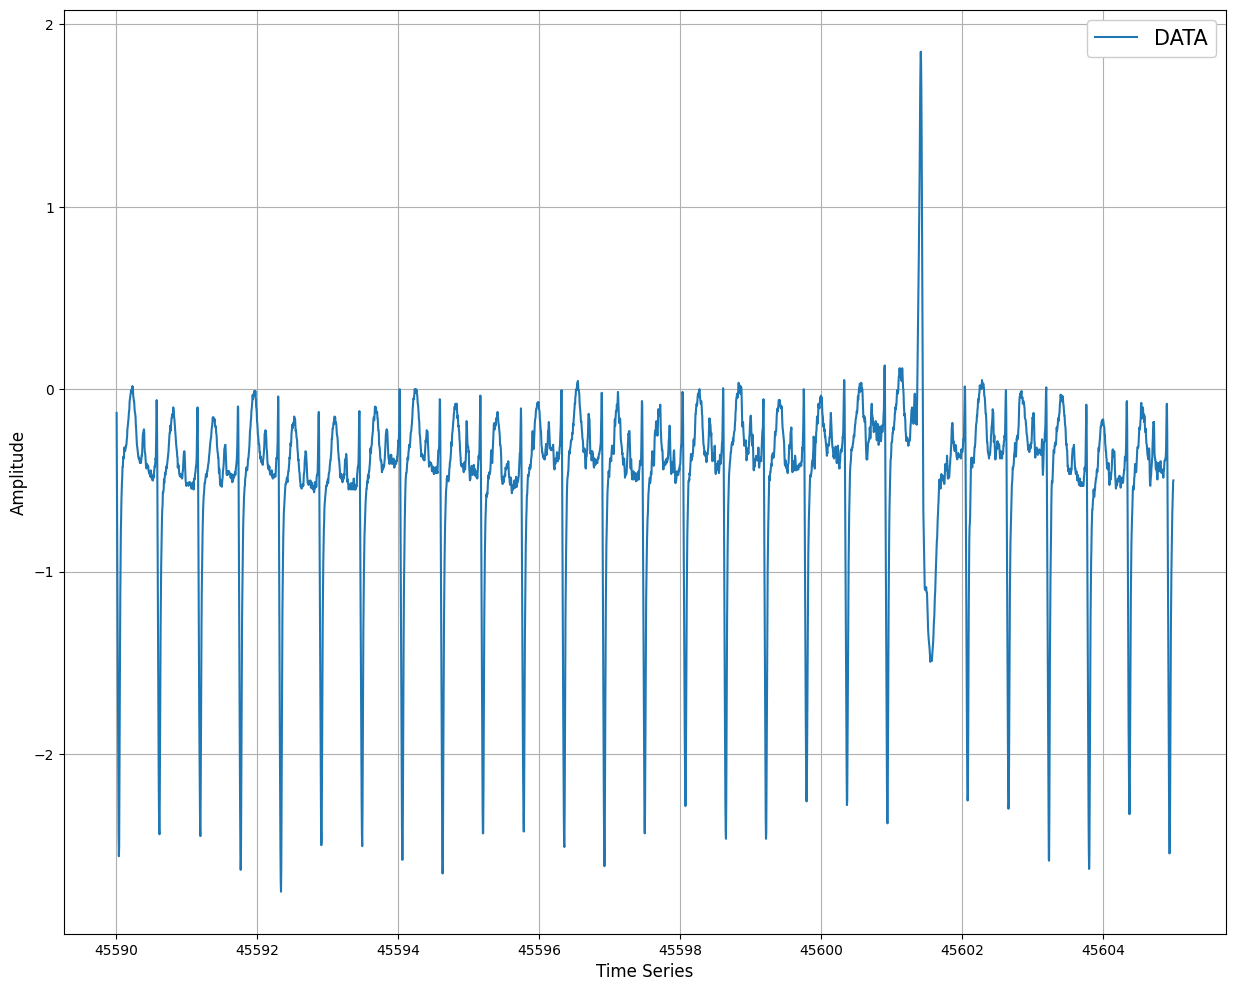

In [4]:
# データの可視化
fig = plt.figure(figsize=(15, 12))

plt.plot(df_csv.iloc[:, 1], label='DATA')
plt.xlabel("Time Series", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

In [5]:
# 訓練データ
train_data = df_csv.iloc[1:2000, 1]
# 検証データ
test_data = df_csv.iloc[2000:, 1]

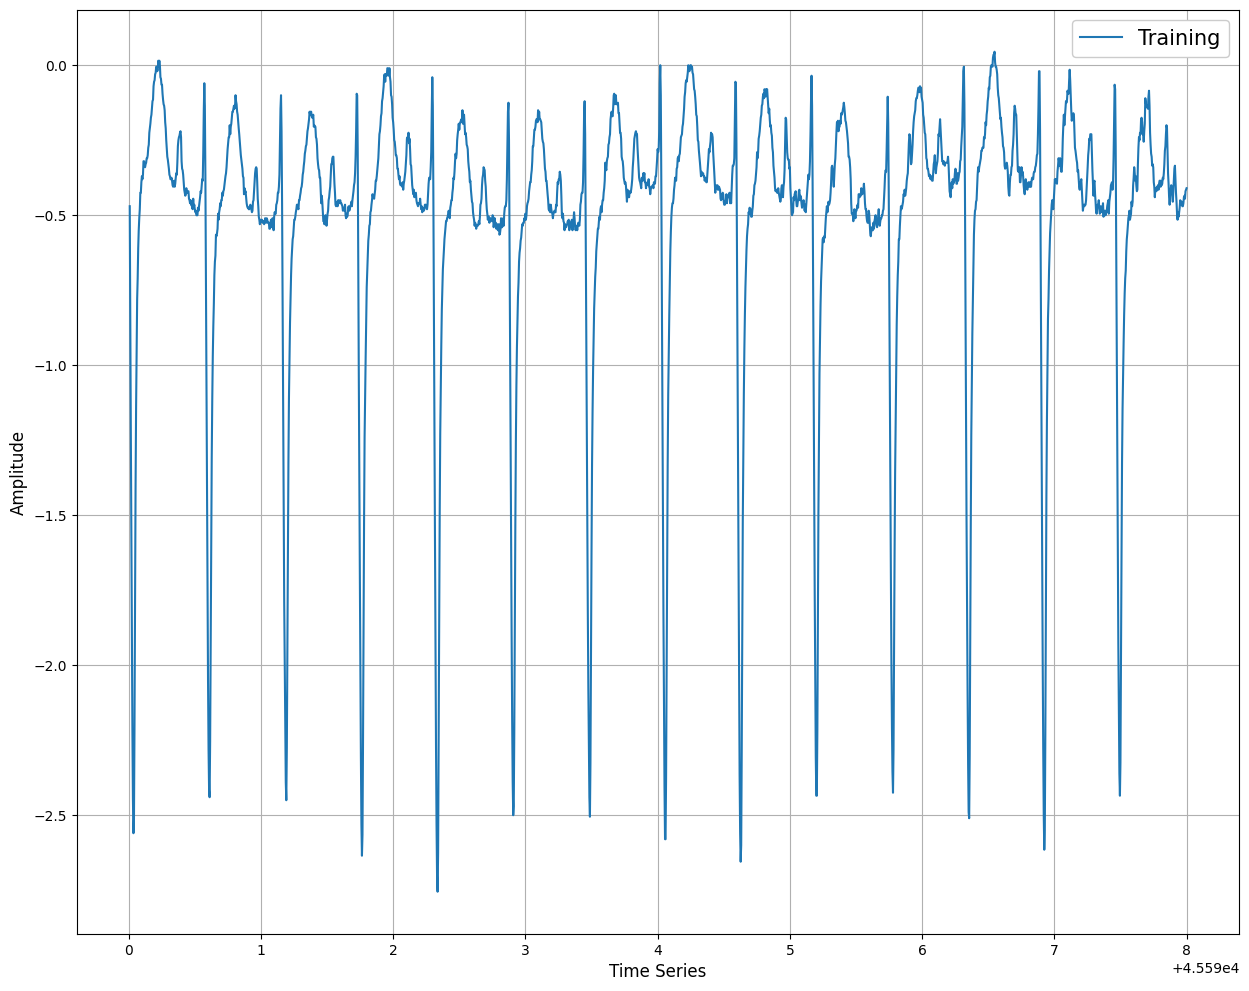

In [6]:
# 訓練データの可視化
fig = plt.figure(figsize=(15, 12))

plt.plot(train_data, label='Training')
plt.xlabel("Time Series", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

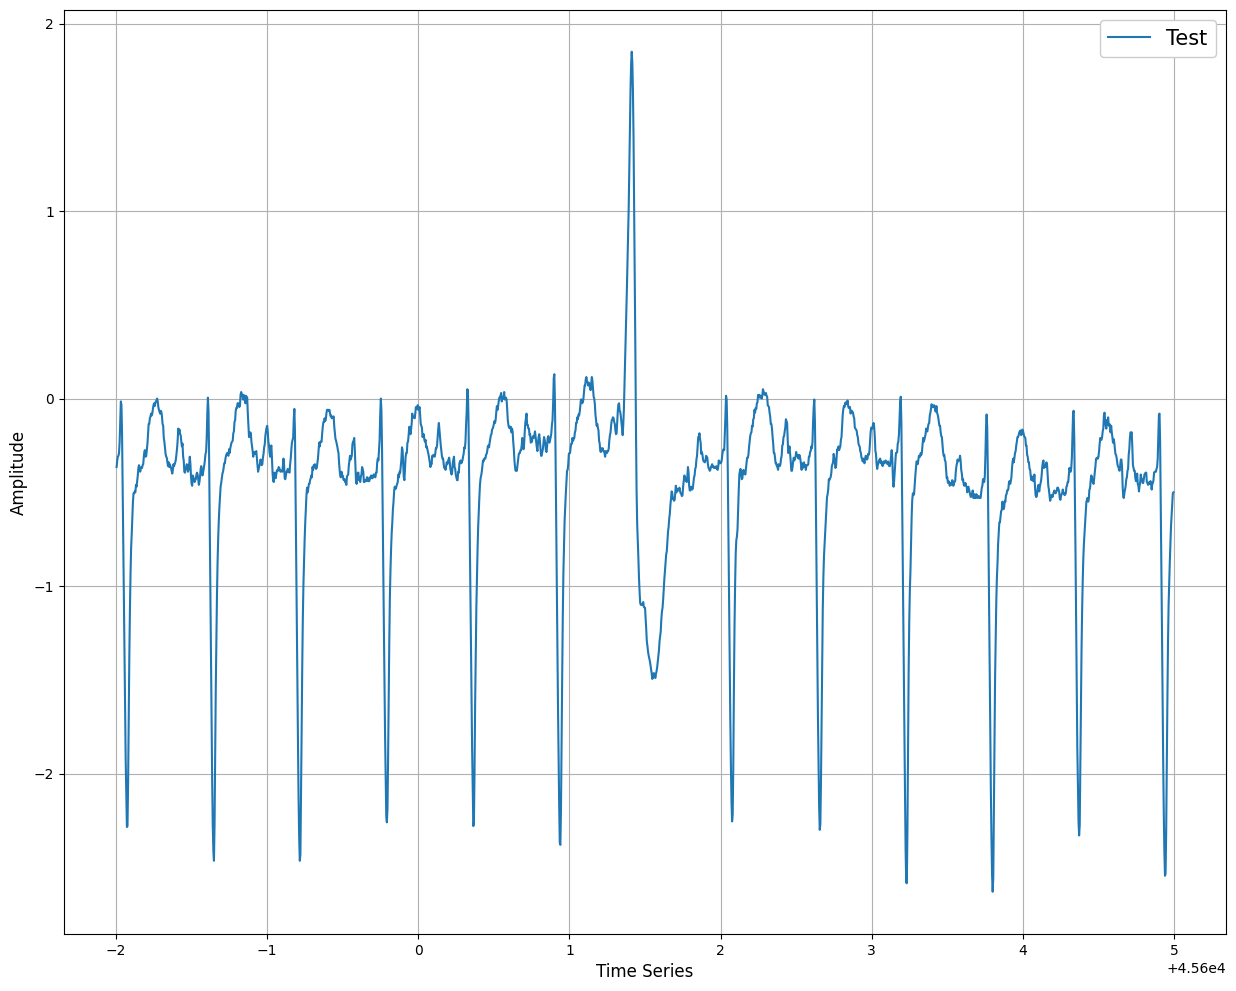

In [7]:
# 検証データの可視化
fig = plt.figure(figsize=(15, 12))

plt.plot(test_data, label='Test')
plt.xlabel("Time Series", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

In [8]:
# スライド窓の幅
width = 100

In [9]:
# 近傍法のkの値
k = 1

In [10]:
def vector_by_slide_window(data, dim):
    vec = np.empty((0, dim), float)
    for i in range(data.size - dim + 1):
        tmp = np.array(data[i:i+dim])[::-1].reshape((1, -1))
        vec = np.append(vec, tmp, axis=0)
    return vec

In [11]:
# スライド窓を用いたベクトルの生成
train = vector_by_slide_window(np.array(train_data), width)
test = vector_by_slide_window(np.array(test_data), width)

In [12]:
# 近傍法による検出モデル構築
clf = NearestNeighbors(n_neighbors=k)
clf.fit(train)

NearestNeighbors(n_neighbors=1)

In [13]:
# 距離の計算(dist)
d = clf.kneighbors(test)[0]

In [14]:
# 距離の正規化(score)
mx = np.max(d)
d = d / mx

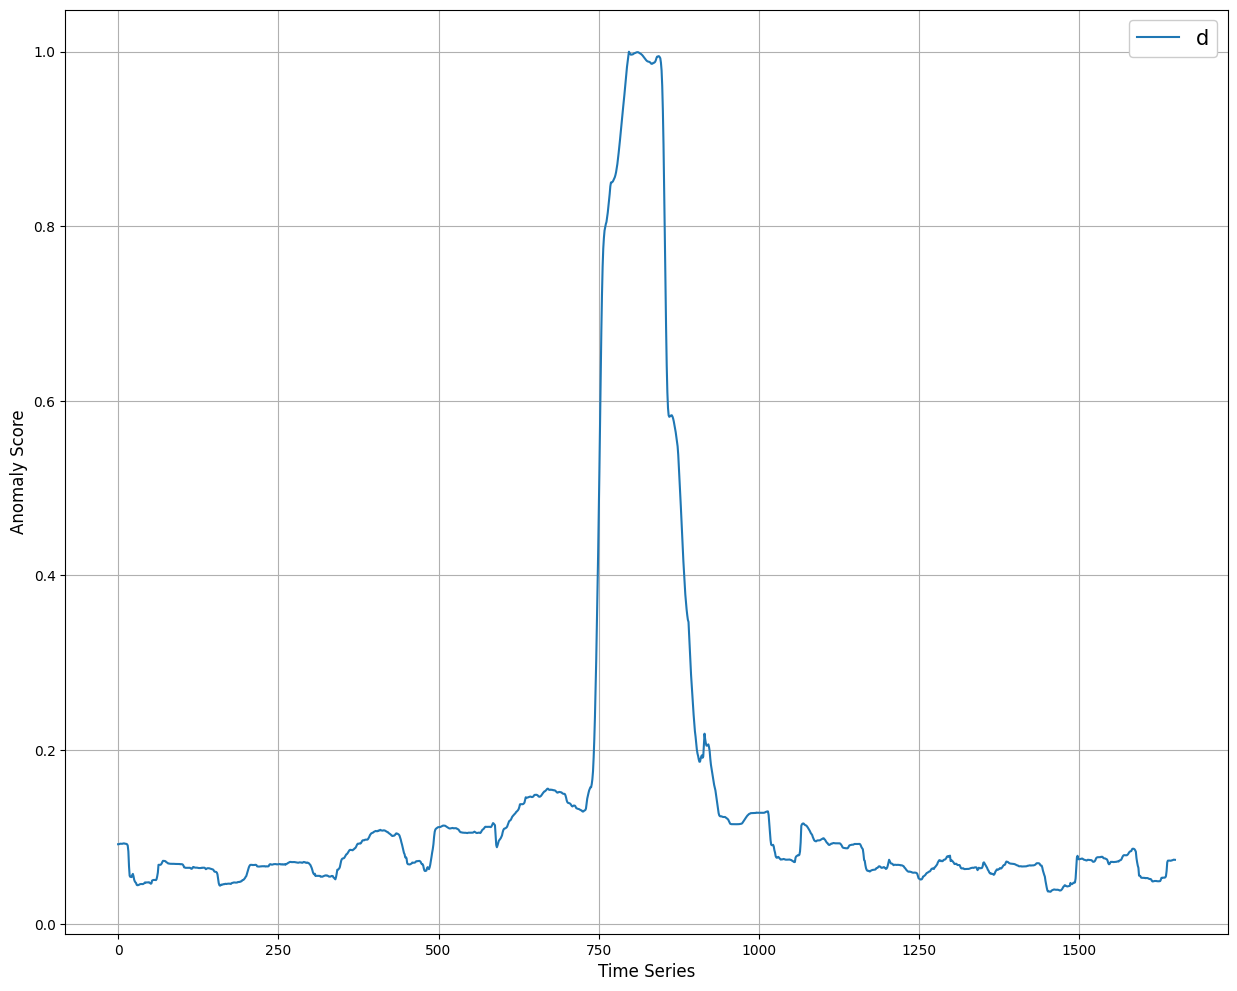

In [15]:
# 異常部位の可視化
fig = plt.figure(figsize=(15, 12))

plt.plot(d, label='d')
plt.xlabel("Time Series", fontsize=12)
plt.ylabel("Anomaly Score", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

ユークリッド距離$dist$と$score$を用いて、再度異常度をみてみる

In [16]:
# 2点間の距離（ユークリッド距離）
def dist(pt1, pt2):
    return np.sqrt(((pt2 - pt1) ** 2).sum())

# 異常度を計算
# 距離のうち最小のものをk個選び、平均を計算する
def score(dist_list, k):
    dist_list.sort()
    return sum(dist_list[:k]) / k

19.528574466705322


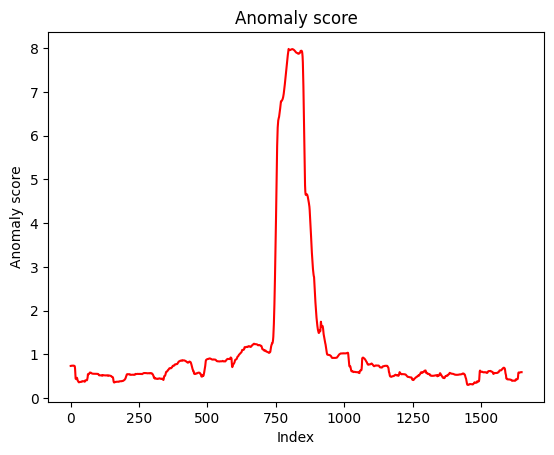

In [17]:
import time

str_time = time.time()
# 異常度を計算
# この実装では計算時間が多くかかってしまう
a_list = []
for x in test:
    dist_list = []
    for xtr in train:
        dist_list.append(dist(x, xtr))
    a = score(dist_list, k)
    a_list.append(a)

end_time = time.time() - str_time
print(end_time)

# プロット
plt.plot(range(len(a_list)), a_list, linestyle="solid", color="red")
plt.title("Anomaly score")
plt.xlabel("Index")
plt.ylabel("Anomaly score")
plt.show()

### 特異スペクトル変換法
素朴に近傍法を使っていましたが、その近傍法による異常部位検出の枠組みは汎用的には使えるものの、特別なチューニングをせずに手法を適用すると  
検出されるべきものを見逃したり、されるべきでないものを拾ってきたりということが多々あります。  
これは時系列に含まれるノイズが、近傍の計算に多大な影響を与えるためです。この点に対処する1つの方向性として、ノイズを除去するための技術を  
明示的に活用することです。その一つに、特異スペクトル変換法があります。

#### 特徴的なパターンの算出
ここで考えるのは、**変化点検知**という問題です。変化点検知は、いままで扱ってきた外れ値検知検出問題とは異なります。  
ちょっと直感的なお話をすると、「変化」という定義は、「ちょっと前となにかが違う」ということだと思います。  
特異スペクトル変換法は、主成分分析の観点からこの定義を素朴に追求したものになります。  
  
観測値としての長さ$T$の時系列が、$D=\{\xi^{(1)}, \xi^{(2)}, ... , \xi^{(T)},\}$として与えられているものとします。  
時刻$t$の周りに、過去側と現在側において、$k$本の部分時系列を使って、2つのデータ行列$X_{1}$と$X_{2}$を作ります。  
  
それぞれの位置には、任意性がありますが、
  
$$
X_{1}^{(t)} \equiv [x^{t-k-w+1}, ... , x^{t-w-1}, x^{t-w}]
$$
$$
X_{2}^{(t)} \equiv [x^{t-k+L-w+1}, ... , x^{t-w+L-1}, x^{t-w+L}]
$$
  
と定義します。それぞれの列ベクトルは長さ$w$の部分時系列であることが自明です。  
こうしておくことで、$X_{1}^{(t)}$は、$\xi^{(t-k-w+1)}$から$\xi^{(t-1)}$までのデータ、すなわち現在時刻$t$の1つ前までのデータを使って構成されていることになります。データ行列$X_{1}$は、部分時系列の直近の過去の来歴の情報が入っています。その意味で、この行列を**履歴行列**と呼ぶことがあります。対して、$X_{2}$は**テスト行列**などど呼ばれることがあります。  
  
$L$は、履歴行列とテスト行列の相互の位置を定める非負整数で、通常、**ラグ**という呼び方をします。  
  
それぞれのデータにおいて、特徴的なパターンを捉える最も素朴な方法は、部分時系列(列ベクトル)の１次結合を考えることです。  
例えば、$X_{1}^{(t)}$の場合であれば、  
  
$$
x^{(t-k)}v_{k}^{(t)} + ... + x^{(t-2)}v_{2}^{(t)} + x^{(t-1)}v_{1}^{(t)} すなわち X_{1}^{(t)}v^{(t)}
$$
  
となります。ただし、$v^{(t)} = [v_{1}^{(t)}, v_{2}^{(t)}, ... , v_{k}^{(t)}]^{T}$です。  
  
**異なる部分時系列同士のバランスのみが重要**なので、制約として、$v^{(t)^{T}}v^{(t)}=1$を課します。  
「特徴的なパターン」というものは、ベクトルのイメージで言えば、**最も人気のある方向**ということになるので、各ベクトルが似た方向を向いていて  
相互に強めあったベクトルの集合になります。  
  
これを表現するために、**特異値分解**という手法を用いますが、詳細は省きます。  
特異値分解によって時系列データの特徴パターンを求め、それに基づき、変化度の定義をした上で、変化度を求める手法を**特異スペクトル変換**または特異スペクトル解析といいます。フーリエ解析との混同を防ぐため、また生の時系列を変化度の時系列に「変換」という雰囲気を出すために、本来は、  
特異スペクトル変換が望ましいです。  

実は、主成分分析と似たような議論になっていますが、1つだけ重要で異なる相違があります。  
特異スペクトル変換法では、部分時系列の**平均値を引かない**ということです。平均値を引かない理由は、今問題にしているのは、部分時系列の  
ベクトルのなす分散ではなく、ベクトルそのものであるからです。特異スペクトル変換法における主部分空間と、主成分分析による主部分空間はこの点において**まったく異なる**議論をしているわけです。

#### 変化度の定義
時刻$t$において、過去側と現在側で主部分空間が求まったとすれば、両者の食い違いを定量化することで、その時刻での変化度が定義できます。  
これは、カーネル主成分分析における変化解析問題でも同じような話ができて、変化度は次のように定義できます。  
  
$$
a(t) = 1 - \parallel U_{m}^{(t)^{T}}Q_{m}^{(t)}\parallel _{2}^{2} = 1 - (U_{m}^{(t)^{T}}Q_{m}^{(t)}の最大特異値)^{2}
$$
  
ここで、$U_{m}^{(t)}, Q_{m}^{(t)}$はそれぞれ、過去側の主部分空間の基底の集合、現在側の主部分空間の基底の集合を表しています。

手順の概要は以下のようになります。  
  
#### 特異スペクトル変換
時系列データを用意して、窓幅、履歴行列の列サイズ、ラグ、パターン数を決めておく。  
1) 履歴行列とテスト行列を作る  
2) 特異値分解を、履歴行列とテスト行列に用いて、$U_{m}^{(t)}, Q_{m}^{(t)}$を求める  
3) $U_{m}^{(t)}, Q_{m}^{(t)}$の最大特異値を計算し、上記の式で、$a(t)$の計算をする

In [18]:
# CSVファイルの読み込み
df_csv = pd.read_csv('chfdb_chf13_45590.txt', index_col=0, sep='\t')

In [19]:
w = 50  # width
m = 2
k = int(w/2)
L = int(k/2)  # lag
Tt = test_data.size
score = np.zeros(Tt)

In [20]:
k, L, Tt

(25, 12, 1749)

In [21]:
# 訓練データ
train_data = df_csv.iloc[1:2000, 1]
# 検証データ
test_data = df_csv.iloc[2000:, 1]

In [22]:
# 特異値分解
for t in range(w+k, Tt-L+1+1):
    t_start = t-w-k+1
    t_end = t-1
    X1 = vector_by_slide_window(test_data[t_start:t_end], w).T[::-1, :]  # 履歴行列
    X2 = vector_by_slide_window(test_data[(t_start+L):(t_end+L)], w).T[::-1, :]  # テスト行列

    U1, s1, V1 = np.linalg.svd(X1, full_matrices=True)
    U1 = U1[:, 0:m]
    U2, s2, V2 = np.linalg.svd(X2, full_matrices=True)
    U2 = U2[:, 0:m]

    U, s, V = np.linalg.svd(U1.T.dot(U2), full_matrices=True)
    sig1 = s[0]
    score[t] = 1 - np.square(sig1)

In [25]:
score

array([nan, nan, nan, ..., nan, nan, nan])

In [23]:
# 異常度を正規化
score = score / np.max(score)
score

<ipython-input-23-9bfd5a3d7d86>:2: RuntimeWarning: invalid value encountered in true_divide
  score = score / np.max(score)


array([nan, nan, nan, ..., nan, nan, nan])

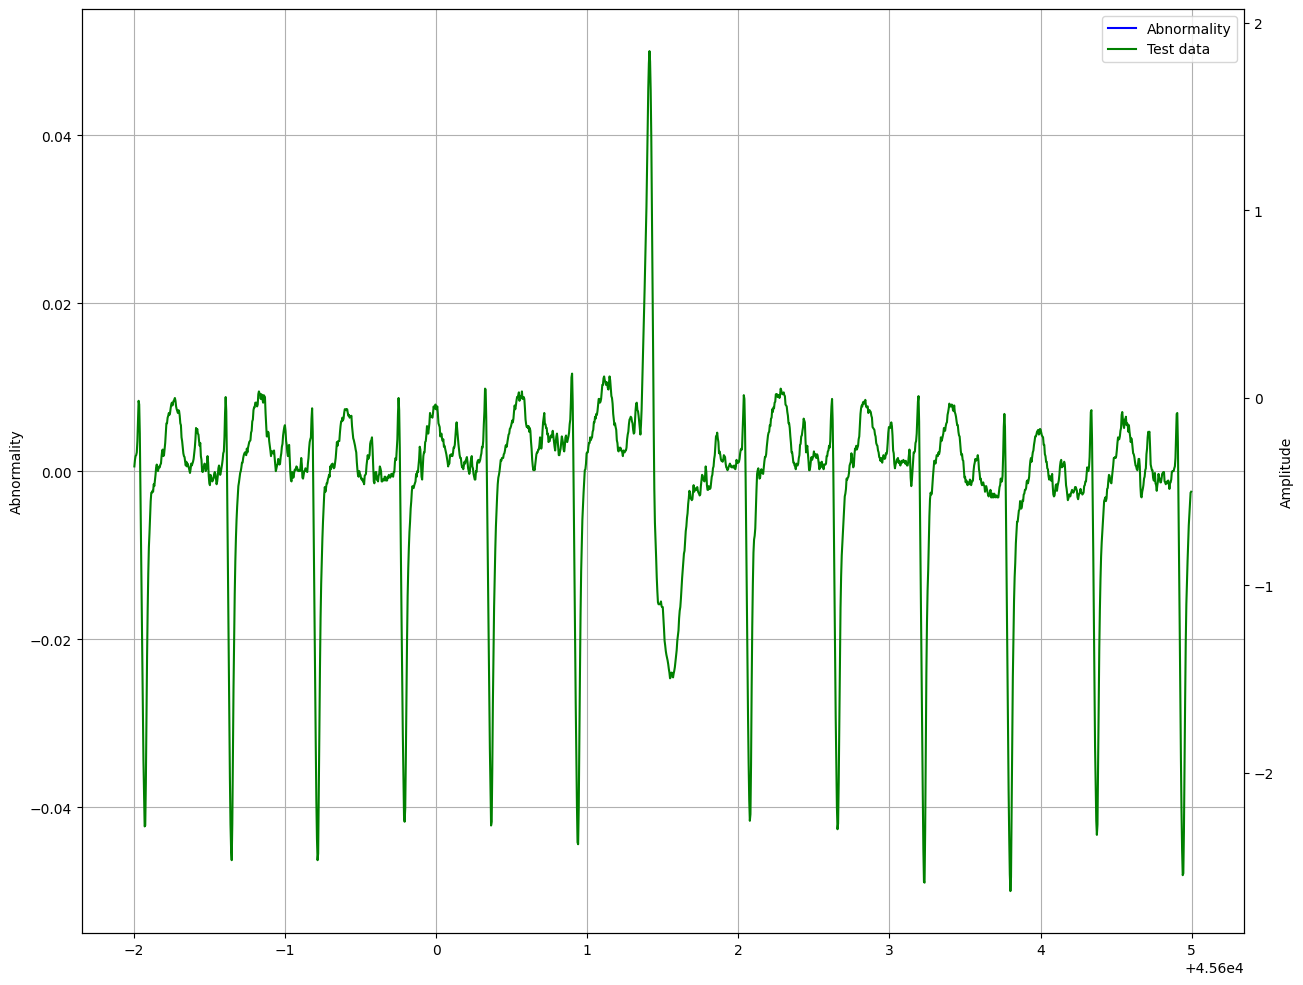

In [24]:
# グラフ作成
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

p1, = ax1.plot(score, '-b')
ax1.set_ylabel('Abnormality')
p2, = ax2.plot(test_data, '-g')
ax2.set_ylabel('Amplitude')
ax1.legend([p1, p2], ["Abnormality", "Test data"])
ax1.grid()

### 自己回帰モデル、もとい今後の展望を踏まえた最後

In [26]:
import random
from keras.callbacks import EarlyStopping
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow.random import set_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [27]:
# load, average and merge sensor samples
data_dir = 'location10_data.csv'

In [28]:
df = pd.read_csv(data_dir, index_col=0)
df

,timestamp,location_id,device_id,variable1,variable2,variable3,variable4,variable5
0,2020-07-01 00:09:57,10,4,2.250,0.083,0.228,0.147,54.50
1,2020-07-01 00:09:58,10,5,1.602,0.098,0.187,0.173,58.30
2,2020-07-01 00:10:01,10,1,1.501,0.039,0.123,0.127,52.49
3,2020-07-01 00:10:01,10,3,1.487,0.106,0.117,0.093,61.58
4,2020-07-01 00:10:06,10,2,1.532,0.079,0.171,0.143,61.41
...,...,...,...,...,...,...,...,...
21595,2020-07-30 23:55:57,10,5,1.945,0.097,0.165,0.107,60.79
21596,2020-07-30 23:57:44,10,2,2.167,0.113,0.128,0.153,61.99
21597,2020-07-30 23:59:13,10,1,2.005,0.059,0.143,0.133,52.75
21598,2020-07-31 00:00:16,10,4,1.395,0.096,0.104,0.083,51.53


In [29]:
df_device1 = df[df['device_id']==1]
df_device1

,timestamp,location_id,device_id,variable1,variable2,variable3,variable4,variable5
2,2020-07-01 00:10:01,10,1,1.501,0.039,0.123,0.127,52.49
9,2020-07-01 00:20:06,10,1,1.511,0.038,0.191,0.110,55.93
13,2020-07-01 00:30:02,10,1,1.328,0.083,0.138,0.107,59.20
19,2020-07-01 00:40:04,10,1,2.108,0.080,0.174,0.160,60.38
24,2020-07-01 00:50:05,10,1,2.011,0.052,0.209,0.170,59.15
...,...,...,...,...,...,...,...,...
21577,2020-07-30 23:19:00,10,1,2.075,0.035,0.181,0.147,59.32
21582,2020-07-30 23:29:04,10,1,1.711,0.050,0.192,0.107,55.08
21587,2020-07-30 23:39:09,10,1,2.129,0.073,0.175,0.153,52.74
21592,2020-07-30 23:49:14,10,1,1.687,0.078,0.179,0.160,56.80


In [30]:
df_device1 = df_device1.drop(columns=["location_id", "device_id", "variable5"]).set_index("timestamp")
df_device1

,variable1,variable2,variable3,variable4
timestamp,,,,
2020-07-01 00:10:01,1.501,0.039,0.123,0.127
2020-07-01 00:20:06,1.511,0.038,0.191,0.110
2020-07-01 00:30:02,1.328,0.083,0.138,0.107
2020-07-01 00:40:04,2.108,0.080,0.174,0.160
2020-07-01 00:50:05,2.011,0.052,0.209,0.170
...,...,...,...,...
2020-07-30 23:19:00,2.075,0.035,0.181,0.147
2020-07-30 23:29:04,1.711,0.050,0.192,0.107
2020-07-30 23:39:09,2.129,0.073,0.175,0.153


#### このデータを使って、時系列異常検知モデルを作ってみる

In [31]:
# 555ステップの学習用データを用意
train_data = df_device1[:555]
len(train_data)

555

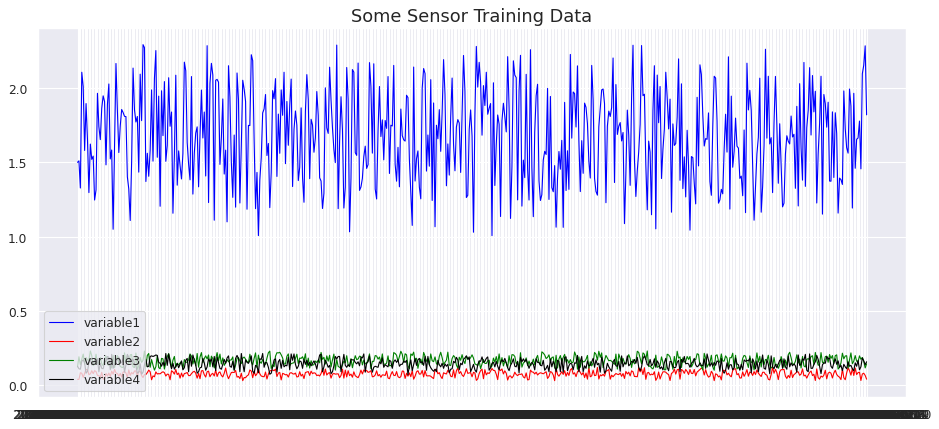

In [32]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_data['variable1'], label='variable1', color='blue', animated = True, linewidth=1)
ax.plot(train_data['variable2'], label='variable2', color='red', animated = True, linewidth=1)
ax.plot(train_data['variable3'], label='variable3', color='green', animated = True, linewidth=1)
ax.plot(train_data['variable4'], label='variable4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Some Sensor Training Data', fontsize=16)
plt.show()

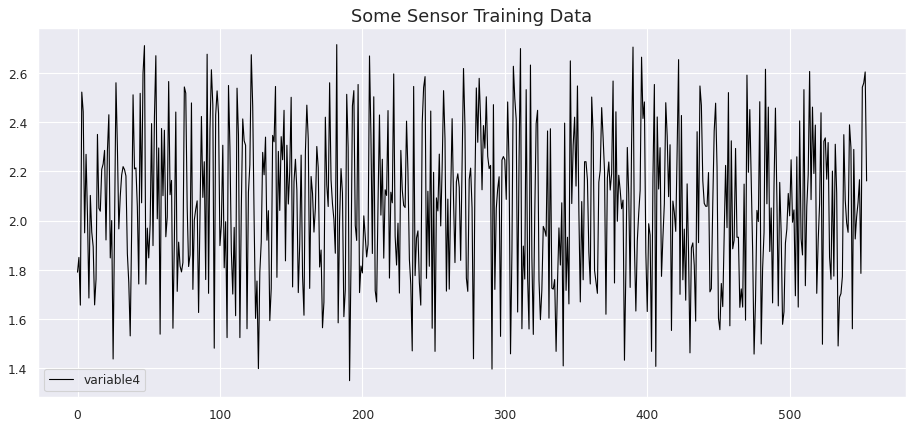

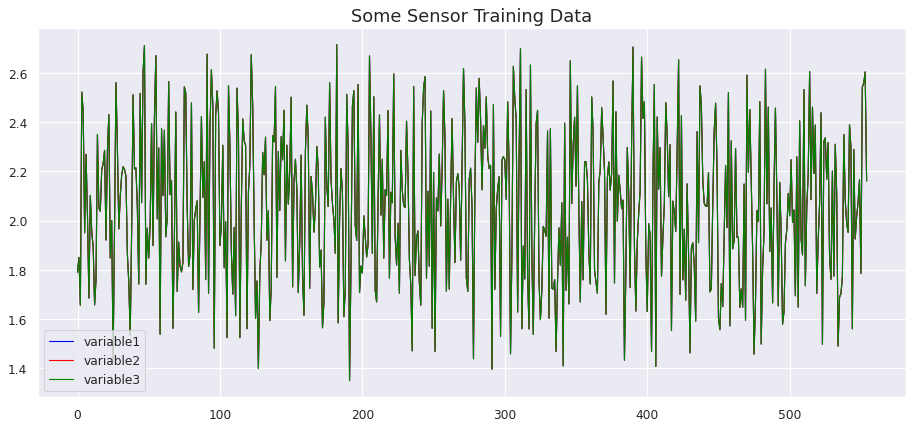

In [33]:
# 高速フーリエ変換
train_fft = np.fft.fft(train_data)

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='variable4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Some Sensor Training Data', fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='variable1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,0].real, label='variable2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,0].real, label='variable3', color='green', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Some Sensor Training Data', fontsize=16)
plt.show()

In [34]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [35]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)

Training data shape: (555, 1, 4)


### LSTM Auto-Encoderによる実験
**ESANN 2015**  

In [36]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [37]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1344      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [38]:
# Early-stopping
early_stopping = EarlyStopping(patience=1E-10, verbose=10)

In [39]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05, callbacks=[early_stopping]).history

Epoch 1/100
53/53 [==============================] - 7s 19ms/step - loss: 0.4759 - val_loss: 0.4328
Epoch 2/100
53/53 [==============================] - 0s 6ms/step - loss: 0.3877 - val_loss: 0.3229
Epoch 3/100
53/53 [==============================] - 0s 6ms/step - loss: 0.2507 - val_loss: 0.1854
Epoch 4/100
53/53 [==============================] - 0s 6ms/step - loss: 0.1792 - val_loss: 0.1676
Epoch 5/100
53/53 [==============================] - 0s 6ms/step - loss: 0.1743 - val_loss: 0.1638
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 0.1738 - val_loss: 0.1648
Epoch 6: early stopping


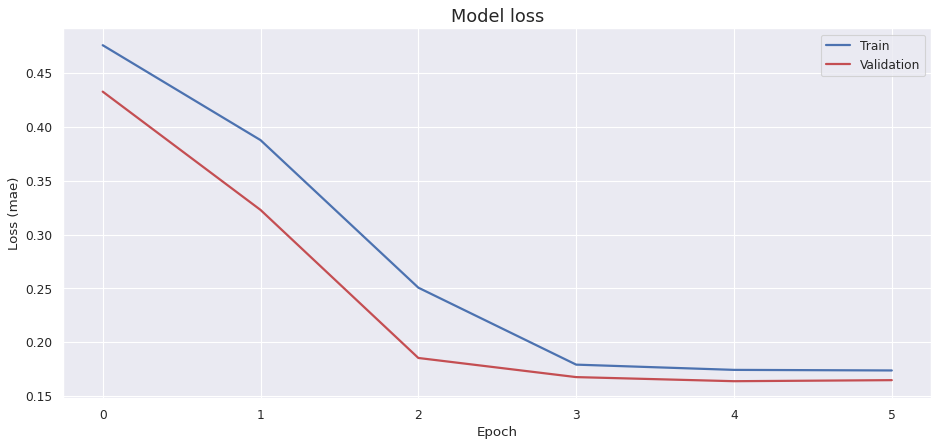

In [40]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [41]:
# fit the model to the data
nb_epochs = 500
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/500
53/53 [==============================] - 0s 7ms/step - loss: 0.1730 - val_loss: 0.1627
Epoch 2/500
53/53 [==============================] - 0s 6ms/step - loss: 0.1728 - val_loss: 0.1635
Epoch 3/500
53/53 [==============================] - 0s 7ms/step - loss: 0.1725 - val_loss: 0.1627
Epoch 4/500
53/53 [==============================] - 0s 7ms/step - loss: 0.1725 - val_loss: 0.1636
Epoch 5/500
53/53 [==============================] - 0s 7ms/step - loss: 0.1728 - val_loss: 0.1615
Epoch 6/500
53/53 [==============================] - 0s 7ms/step - loss: 0.1725 - val_loss: 0.1629
Epoch 7/500
53/53 [==============================] - 0s 6ms/step - loss: 0.1723 - val_loss: 0.1612
Epoch 8/500
53/53 [==============================] - 0s 6ms/step - loss: 0.1720 - val_loss: 0.1605
Epoch 9/500
53/53 [==============================] - 0s 6ms/step - loss: 0.1716 - val_loss: 0.1623
Epoch 10/500
53/53 [==============================] - 0s 7ms/step - loss: 0.1720 - val_loss: 0.1622
Epoch 11/

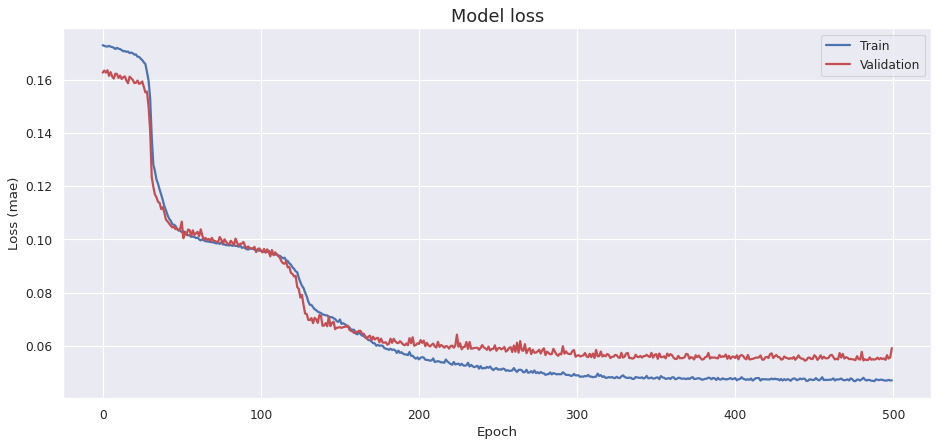

In [42]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

18/18 [==============================] - 1s 4ms/step


<ipython-input-43-b59a75c49bbb>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');


(0.0, 0.5)

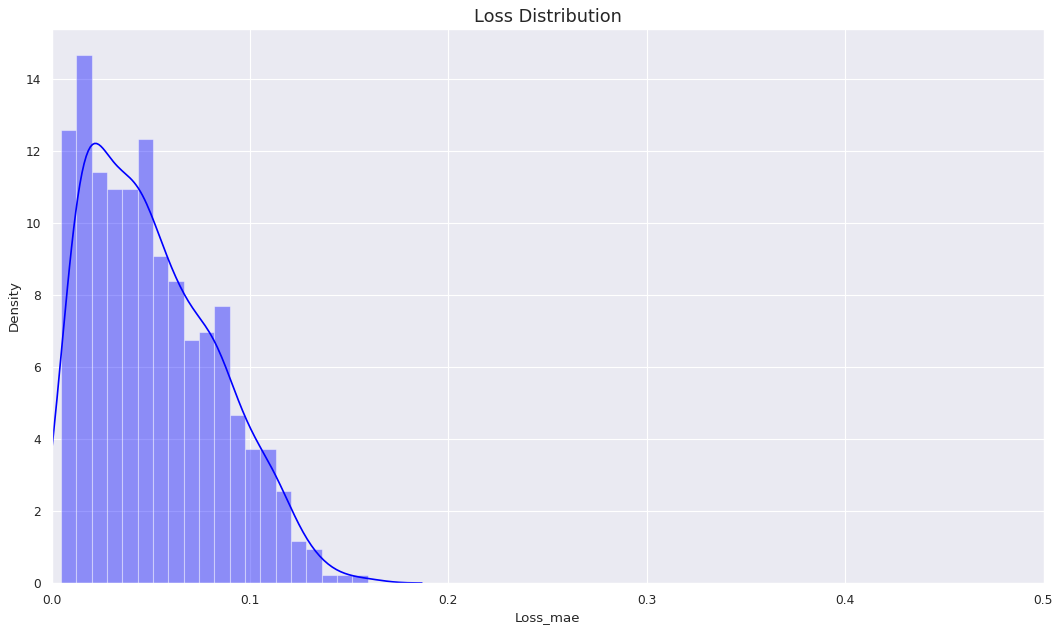

In [43]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train_data.columns)
X_pred.index = train_data.index

scored = pd.DataFrame(index=train_data.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [44]:
# 555ステップの学習用データを用意
test_data = df_device1[555:1000]
len(test_data)

445

In [45]:
test_data_variable1 = test_data["variable1"].to_list()
test_data_variable2 = test_data["variable2"].to_list()
test_data_variable3 = test_data["variable3"].to_list()
test_data_variable4 = test_data["variable4"].to_list()

In [46]:
# 不規則な、電力の上昇(variable1)やトルクの低下(variable3,4)や抵抗の上昇(variable2)も模擬的に再現する
variable1 = []
variable2 = []
variable3 = []
variable4 = []
rand_num = random.randint(1,1000) / 10000
for i in range(len(test_data)):
    if i <= 245:
        variable1.append(test_data_variable1[i])
        variable2.append(test_data_variable2[i])
        variable3.append(test_data_variable3[i])
        variable4.append(test_data_variable4[i])
    if i > 245:
        rand_num += random.randint(1,1000) / 10000
        variable1.append(test_data_variable1[i]*(1+rand_num))
        variable2.append(test_data_variable2[i]*(1+rand_num))
        variable3.append(test_data_variable3[i]*(1-rand_num))
        variable4.append(test_data_variable4[i]*(1-rand_num))

In [47]:
test_data["variable1"] = variable1
test_data["variable2"] = variable2
test_data["variable3"] = variable3
test_data["variable4"] = variable4

<ipython-input-47-36361aa1dc48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["variable1"] = variable1
<ipython-input-47-36361aa1dc48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["variable2"] = variable2
<ipython-input-47-36361aa1dc48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

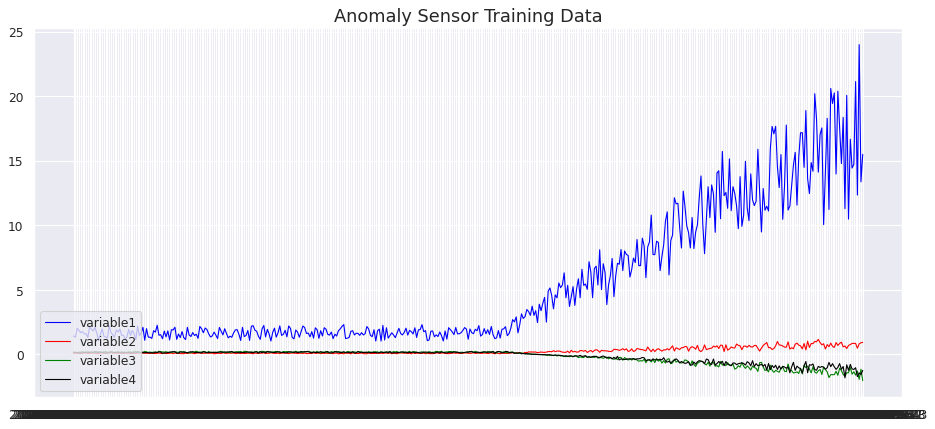

In [48]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_data['variable1'], label='variable1', color='blue', animated = True, linewidth=1)
ax.plot(test_data['variable2'], label='variable2', color='red', animated = True, linewidth=1)
ax.plot(test_data['variable3'], label='variable3', color='green', animated = True, linewidth=1)
ax.plot(test_data['variable4'], label='variable4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Anomaly Sensor Training Data', fontsize=16)
plt.show()

In [49]:
# 高速フーリエ変換
test_fft = np.fft.fft(test_data)

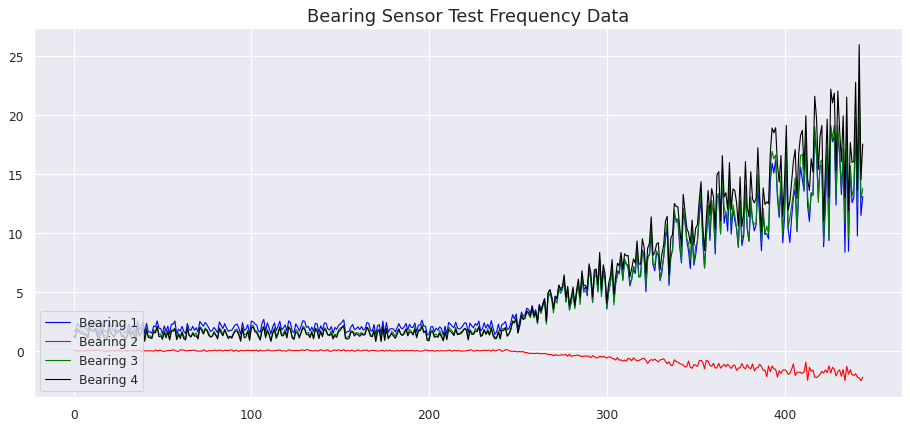

In [50]:
# frequencies of the degrading sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Test Frequency Data', fontsize=16)
plt.show()

In [51]:
X_test = scaler.transform(test_data)

In [52]:
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Test data shape: (445, 1, 4)


In [53]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test_data.columns)
X_pred.index = test_data.index

scored = pd.DataFrame(index=test_data.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.275
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

14/14 [==============================] - 0s 3ms/step


,Loss_mae,Threshold,Anomaly
timestamp,,,
2020-07-04 20:41:18,0.100542,0.275,False
2020-07-04 20:51:21,0.053240,0.275,False
2020-07-04 21:01:20,0.019538,0.275,False
2020-07-04 21:11:16,0.013808,0.275,False
2020-07-04 21:21:17,0.072987,0.275,False


In [54]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train_data.columns)
X_pred_train.index = train_data.index

scored_train = pd.DataFrame(index=train_data.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.275
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

18/18 [==============================] - 0s 2ms/step


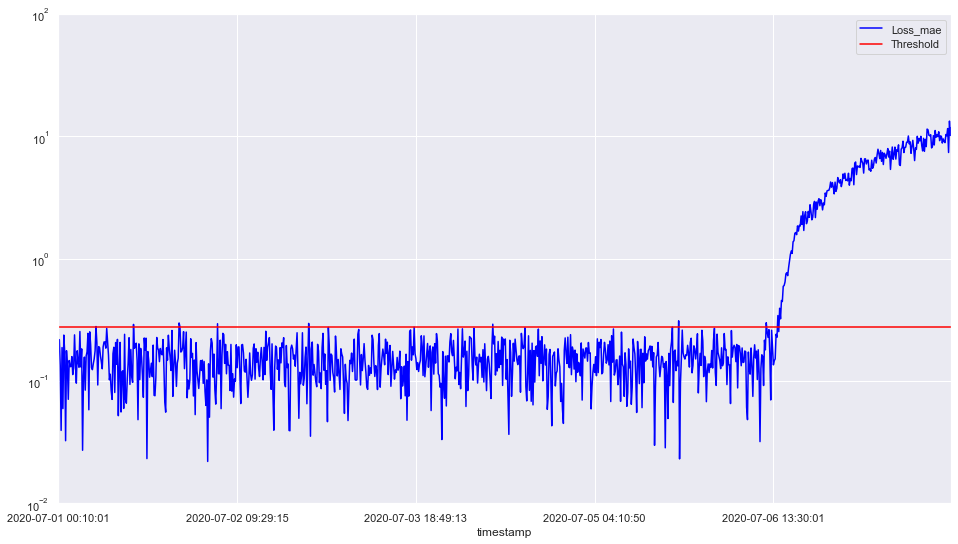

In [ ]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])